In [165]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [166]:
df=pd.read_csv('housePrice.csv')
df.head(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
5,2014-05-02 00:00:00,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA
6,2014-05-02 00:00:00,335000.0,2.0,2.00,1350,2560,1.0,0,0,3,1350,0,1976,0,2616 174th Ave NE,Redmond,WA 98052,USA
7,2014-05-02 00:00:00,482000.0,4.0,2.50,2710,35868,2.0,0,0,3,2710,0,1989,0,23762 SE 253rd Pl,Maple Valley,WA 98038,USA
8,2014-05-02 00:00:00,452500.0,3.0,2.50,2430,88426,1.0,0,0,4,1570,860,1985,0,46611-46625 SE 129th St,North Bend,WA 98045,USA
9,2014-05-02 00:00:00,640000.0,4.0,2.00,1520,6200,1.5,0,0,3,1520,0,1945,2010,6811 55th Ave NE,Seattle,WA 98115,USA


In [167]:
df.shape

(4600, 18)

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [169]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [170]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [171]:
df_numeric = df.copy()
for column in df_numeric.select_dtypes(include=['object', 'datetime']):
    if df_numeric[column].dtype == 'object':
        df_numeric[column] = df_numeric[column].astype('category').cat.codes

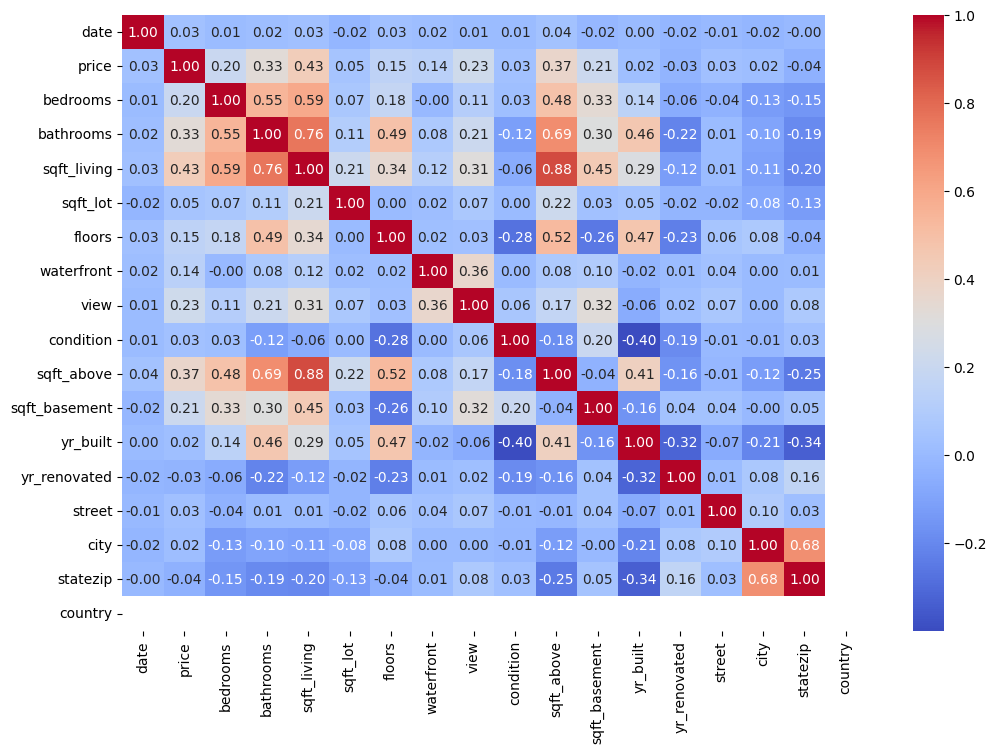

In [172]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [173]:
df_numeric

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,1522,36,62,0
1,0,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,3899,35,58,0
2,0,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,2291,18,26,0
3,0,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,4263,3,7,0
4,0,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,4352,31,31,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,68,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,3447,35,62,0
4596,68,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,960,3,6,0
4597,68,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,4033,32,37,0
4598,69,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,3498,35,71,0


In [174]:
x=df_numeric.drop('price',axis=1)
y=df_numeric['price']
print("shape of x",x.shape)
print("shape of y",y.shape)

shape of x (4600, 17)
shape of y (4600,)


In [175]:
from sklearn .model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=101)

In [176]:
x_train

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
650,12,3.0,2.50,2550,7200,2.0,0,2,3,2550,0,1981,2013,2663,35,64,0
2697,46,2.0,1.00,1230,3800,1.0,0,0,3,1230,0,1928,1954,2785,35,54,0
4138,67,5.0,4.00,7320,217800,2.0,0,0,3,7320,0,1992,0,1557,32,36,0
3298,54,3.0,1.00,1640,18144,1.5,0,0,3,1640,0,1942,1999,271,35,69,0
4387,12,4.0,1.50,1590,131551,1.0,0,3,4,1590,0,1966,0,2041,12,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4079,67,3.0,2.50,1810,4592,2.0,0,0,3,1810,0,1992,0,2243,16,17,0
4171,68,4.0,2.75,2910,18700,1.0,0,0,3,2210,700,1957,1995,4180,36,70,0
599,11,3.0,2.25,2450,42180,1.0,0,0,4,2450,0,1978,2000,1302,9,26,0
1361,25,4.0,2.50,1982,6406,2.0,0,0,3,1982,0,2004,2003,2326,18,18,0


Linear Regression

In [177]:
lm=LinearRegression()

In [178]:
lm.fit(x_train, y_train)

LinearRegression()

In [179]:
coeff_df=pd.DataFrame(lm.coef_,x.columns,columns=['Coefficient'])
coeff_df

,Coefficient
date,482.561735
bedrooms,-49667.998754
bathrooms,55712.110166
sqft_living,152.269288
sqft_lot,-0.635528
floors,37602.628474
waterfront,278286.053557
view,54741.721009
condition,37153.799310
sqft_above,94.110231


In [180]:
prediction=lm.predict(x_test)

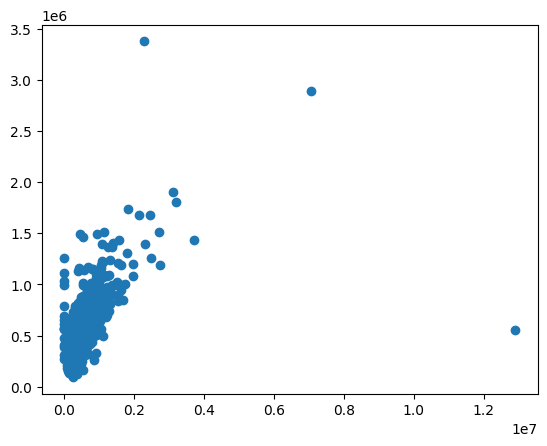

In [181]:
plt.scatter(y_test, prediction)

In [182]:
mae = mean_absolute_error(y_test, prediction)
mse = mean_squared_error(y_test, prediction)
rmse = np.sqrt(mse)
r2 = lm.score(x_test, y_test)

In [183]:
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 167952.05446392033
Mean Squared Error (MSE): 204258237355.42072
Root Mean Squared Error (RMSE): 451949.3747704722
R² Score: 0.29818728952504436


Random Forest Regression

In [184]:
rfg= RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)
rfg.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestRegressor(n_estimators=10, oob_score=True, random_state=0)

In [185]:
prediction=regressor.predict(x_test)

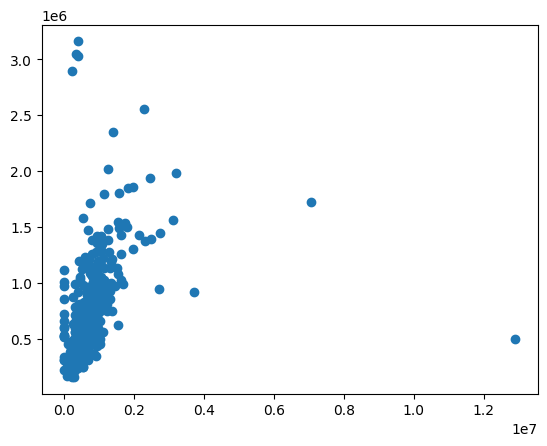

In [186]:
plt.scatter(y_test, prediction)

In [187]:
mae = mean_absolute_error(y_test, prediction)
mse = mean_squared_error(y_test, prediction)
rmse = np.sqrt(mse)
r2 = lm.score(x_test, y_test)

In [188]:
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 152817.54017430797
Mean Squared Error (MSE): 235370698783.55005
Root Mean Squared Error (RMSE): 485150.1816793951
R² Score: 0.29818728952504436


Decision Tree Regression

In [189]:
dtr = DecisionTreeRegressor(random_state = 0)
dtr.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

In [190]:
prediction=dtr.predict(x_test)

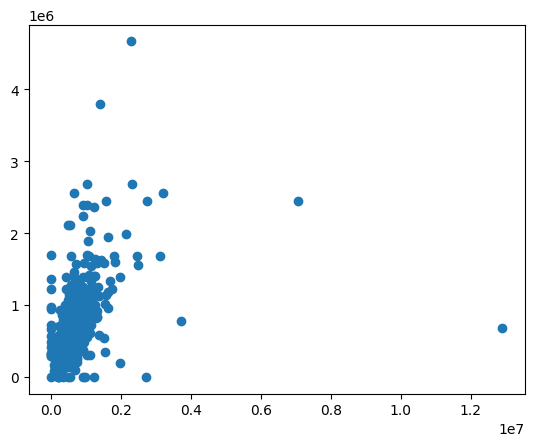

In [191]:
plt.scatter(y_test, prediction)

In [192]:
mae = mean_absolute_error(y_test, prediction)
mse = mean_squared_error(y_test, prediction)
rmse = np.sqrt(mse)
r2 = lm.score(x_test, y_test)

In [193]:
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 183543.4107461322
Mean Squared Error (MSE): 248323559642.8262
Root Mean Squared Error (RMSE): 498320.7397277643
R² Score: 0.29818728952504436


Gradient Boosting Regression

In [194]:
regressor = GradientBoostingRegressor()
regressor.fit(x_train,y_train)

GradientBoostingRegressor()

In [195]:
prediction=regressor.predict(x_test)

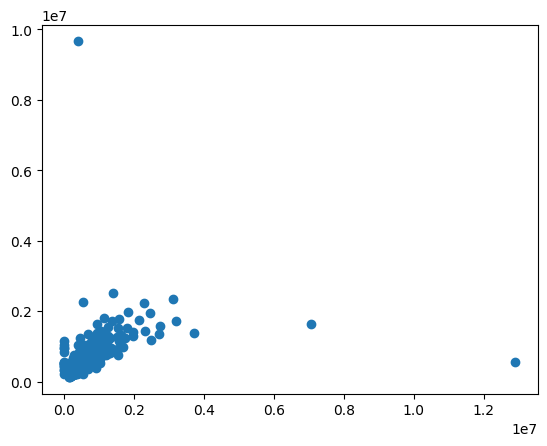

In [196]:
plt.scatter(y_test, prediction)

In [197]:
mae = mean_absolute_error(y_test, prediction)
mse = mean_squared_error(y_test, prediction)
rmse = np.sqrt(mse)
r2 = lm.score(x_test, y_test)

In [198]:
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 151678.8499566378
Mean Squared Error (MSE): 278610831668.45557
Root Mean Squared Error (RMSE): 527835.9893645521
R² Score: 0.29818728952504436


In [200]:
new_house = pd.DataFrame({'date':[27], 'bedrooms':[5.0], 'bathrooms':[2.00], 'sqft_living':[2450], 'sqft_lot':[9488],
       'floors':[1.0], 'waterfront':[0], 'view':[0], 'condition':[4], 'sqft_above':[1240],
       'sqft_basement':[1210], 'yr_built':[1900], 'yr_renovated':[1955], 'street':[135], 'city':[35],
       'statezip':[62], 'country':[0]})

In [205]:
for name, model in models.items():
    price_prediction = model.predict(new_house)
    print(f"{name} predicted price: {price_prediction[0]}")

Linear Regression predicted price: 658737.9902080139
Random Forest predicted price: 659836.51
Decision Tree predicted price: 550000.0
Gradient Boosting predicted price: 602485.8681314042
